# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Penguins.csv')
df1

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 清理数据

In [3]:
df11 = df1.copy()

评估1：结构无问题，每列对应单一值

In [4]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


评估2：2-6项存在缺失值，可改category类型

In [4]:
df11['species'] = df11['species'].astype('category')
df11['sex'] = df11['sex'].astype('category')
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    object  
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(2), float64(4), object(1)
memory usage: 14.5+ KB


In [8]:
df11.query('culmen_length_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [11]:
df11.query('culmen_depth_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [13]:
df11.query('flipper_length_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [14]:
df11.query('body_mass_g.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [15]:
df11.query('sex.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [5]:
df11.dropna(subset=['body_mass_g'], inplace=True)
df11.query('sex.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


评估3：性别缺失项中其他数据完整，暂时保留

In [20]:
df11

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [21]:
df11.drop_duplicates()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


评估4：无重复数据

In [22]:
df11['species'].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [23]:
df11['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [24]:
df11['island'].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [6]:
df11['sex'] = df11['sex'].replace('.', np.nan)

In [7]:
df11['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

无多项同值情况，sex中多余.修改nan

In [8]:
df11.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


无异常值

## 数据探索和整理

In [9]:
df11

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [11]:
sd11 = df11['species'].value_counts()
sd11

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

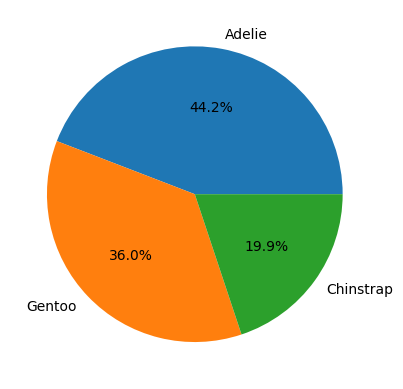

In [16]:
plt.pie(sd11, labels=sd11.index, autopct='%.1f%%')
plt.show()

In [17]:
ld11 = df11['island'].value_counts()
ld11

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

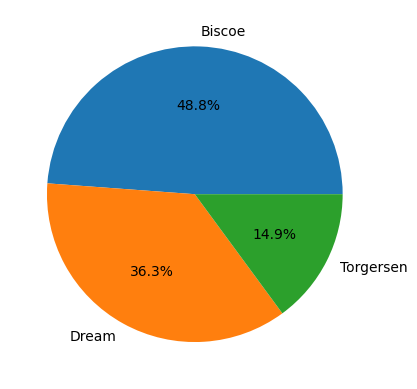

In [18]:
plt.pie(ld11, labels=ld11.index, autopct='%.1f%%')
plt.show()

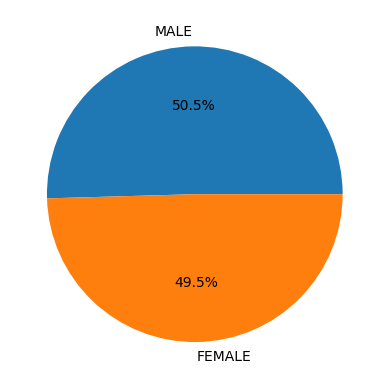

In [21]:
ed11 = df11['sex'].value_counts()
plt.pie(ed11, labels=ed11.index, autopct='%.1f%%')
plt.show()

分别展示三种分类情况

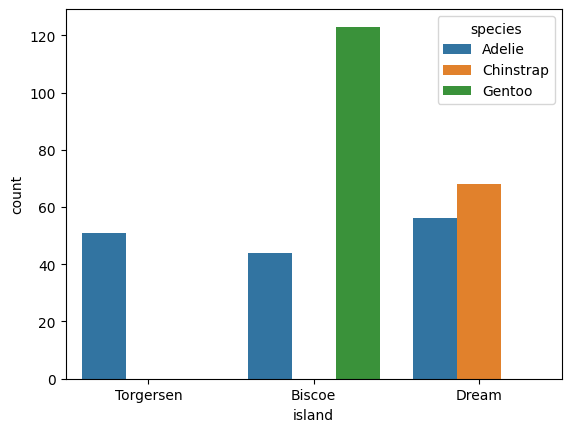

In [25]:
sns.countplot(df11, x='island', hue='species')
plt.show()

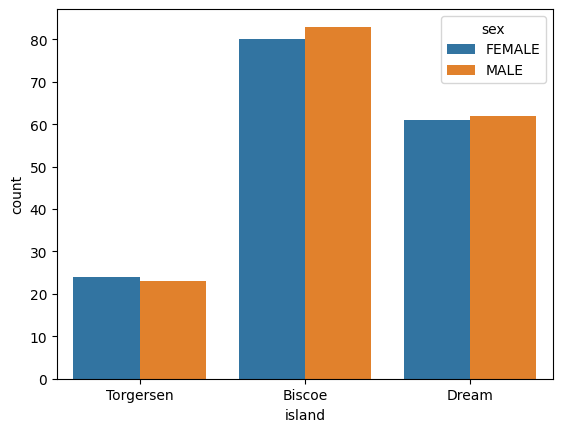

In [26]:
sns.countplot(df11, x='island', hue='sex')
plt.show()

不同类别项之间的关系

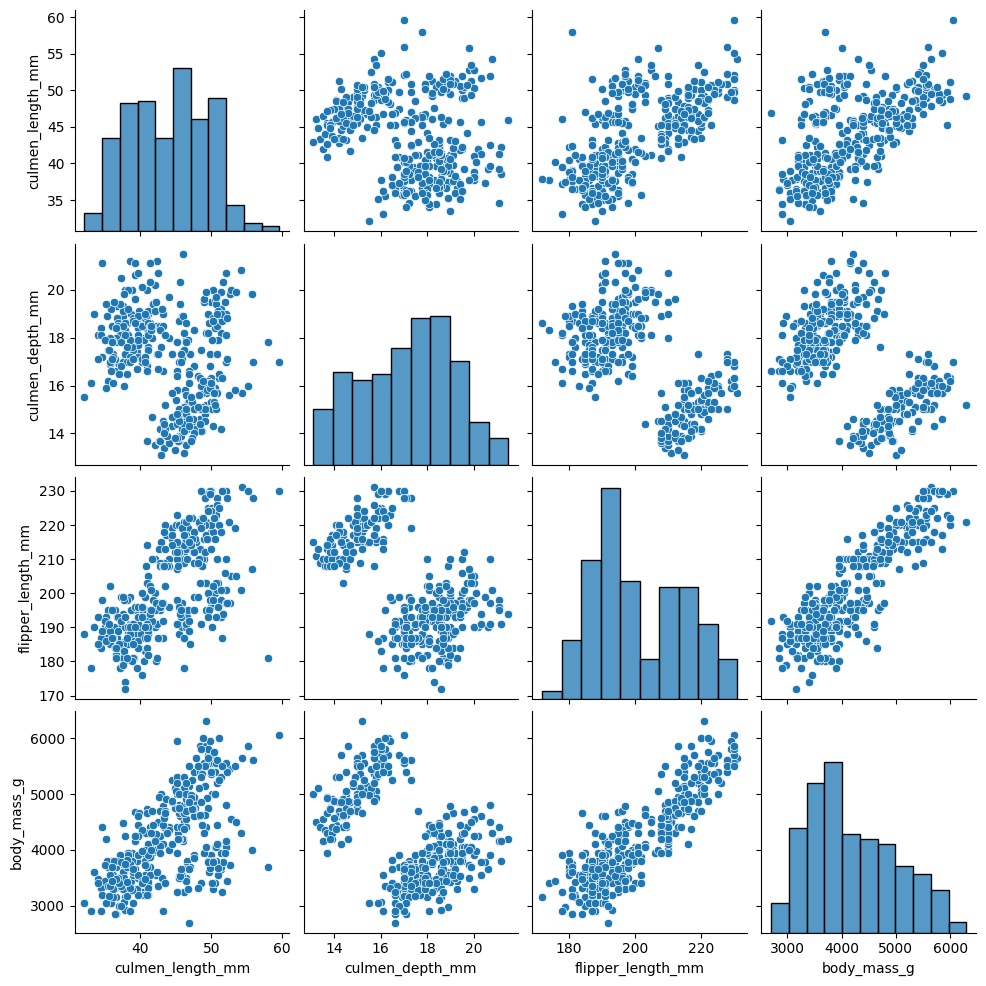

In [29]:
sns.pairplot(df11)

数据群之间不具备正态分布且存在明显的割裂状态，推测为某个类别因素导致的，需要进一步探索

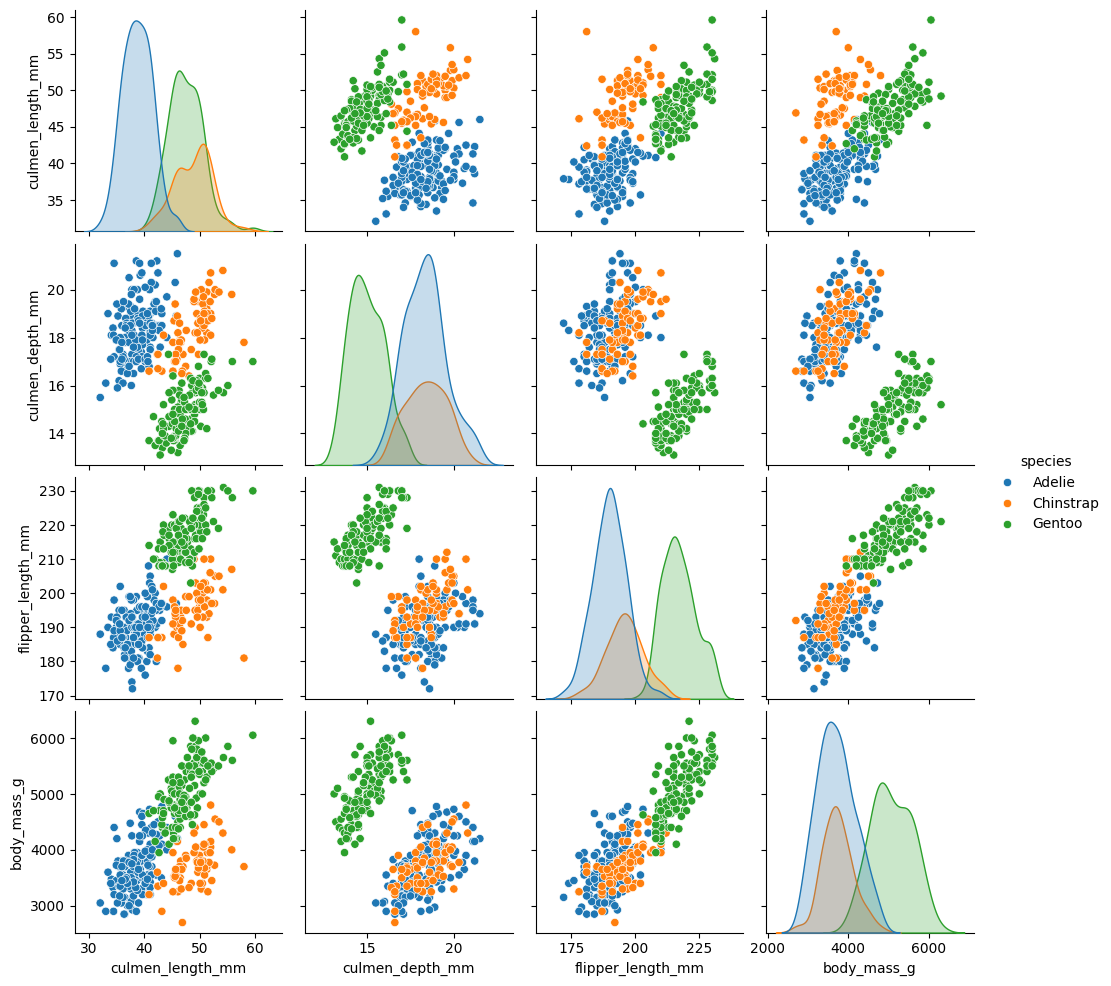

In [32]:
sns.pairplot(df11, hue='species')
plt.show()

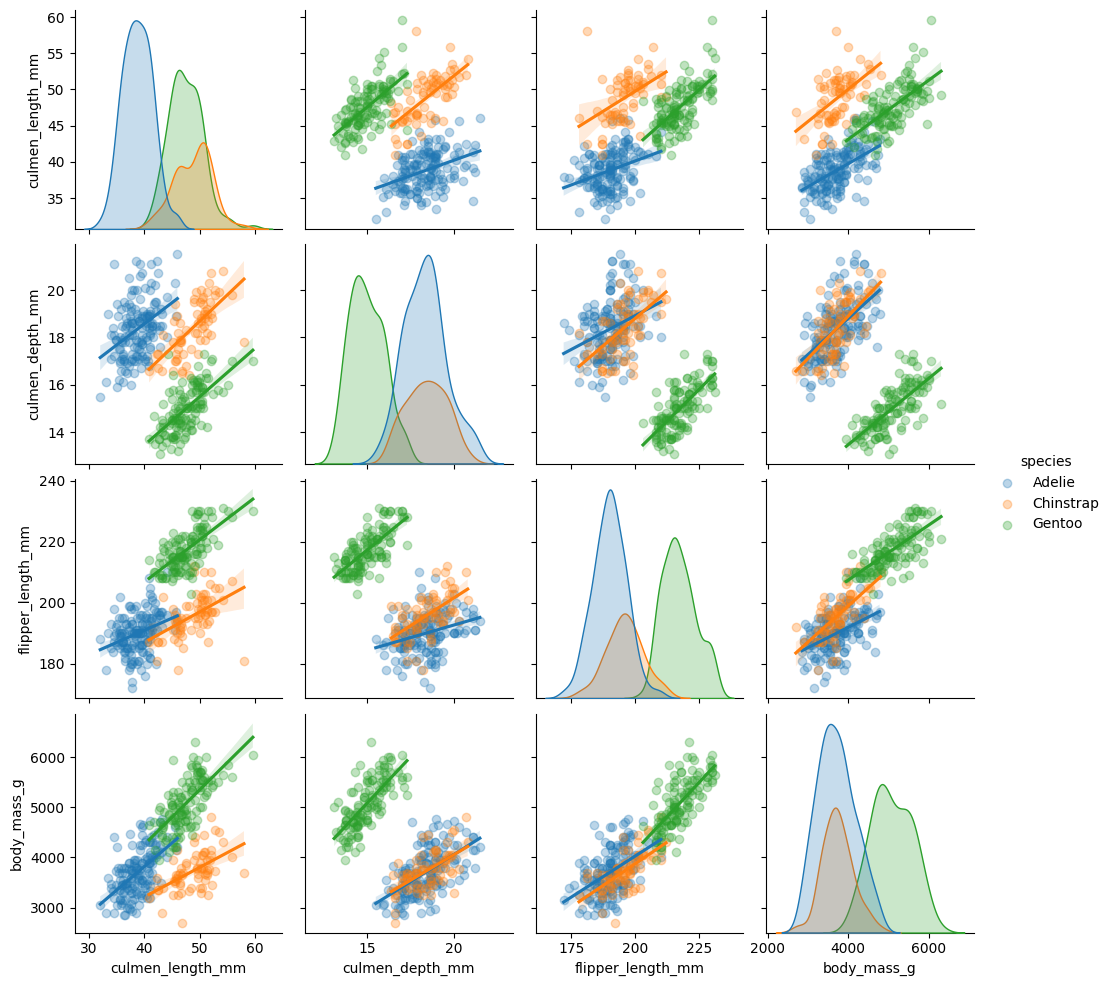

In [35]:
sns.pairplot(df11, hue='species', kind='reg', plot_kws={'scatter_kws':{'alpha':0.3}})
plt.show()

结合回归线可发现，4种数据均呈现正相关性
Adelie嘴锋最短
Gentoo嘴锋最浅
Gentoo鳍最长
Gentoo体重也最重

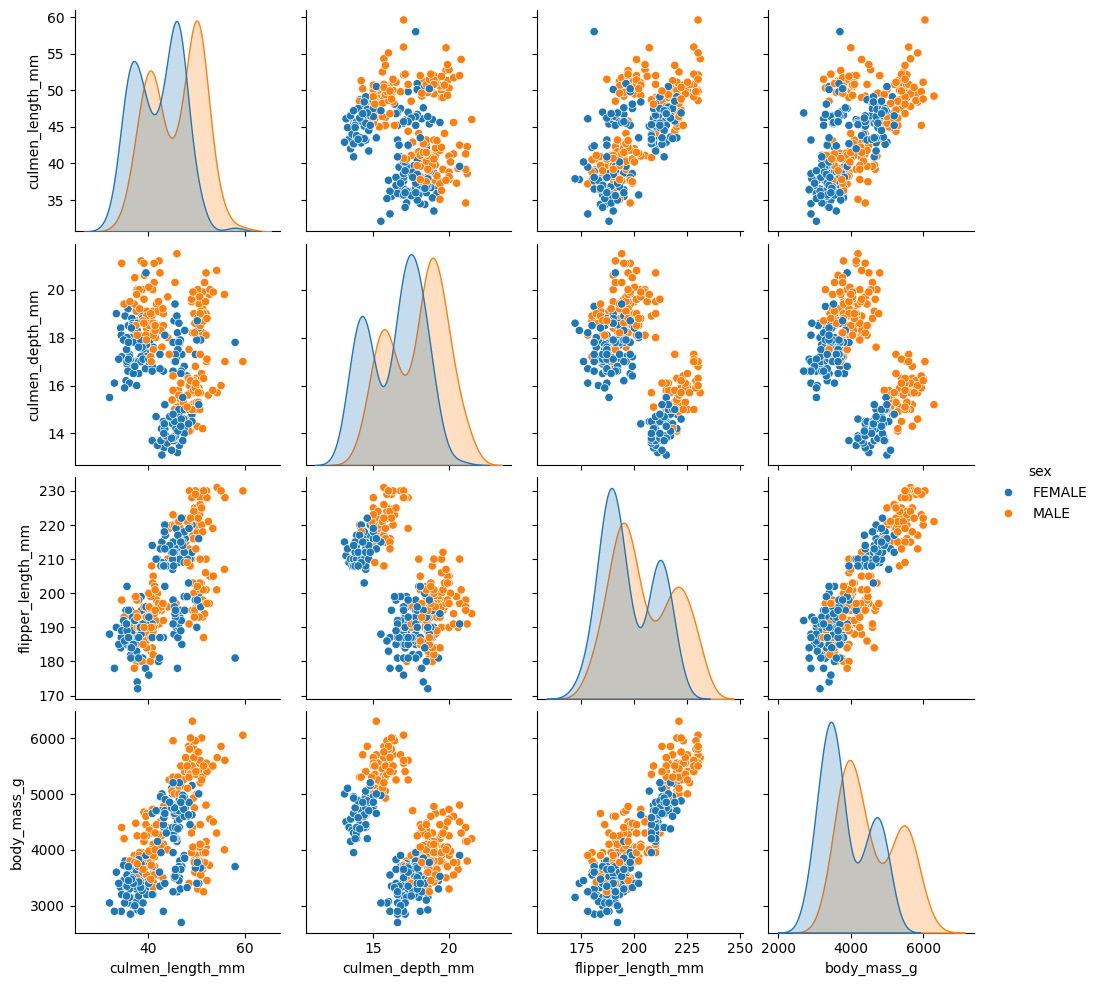

In [36]:
sns.pairplot(df11, hue='sex')
plt.show()

各项数据雄性明显高于雌性

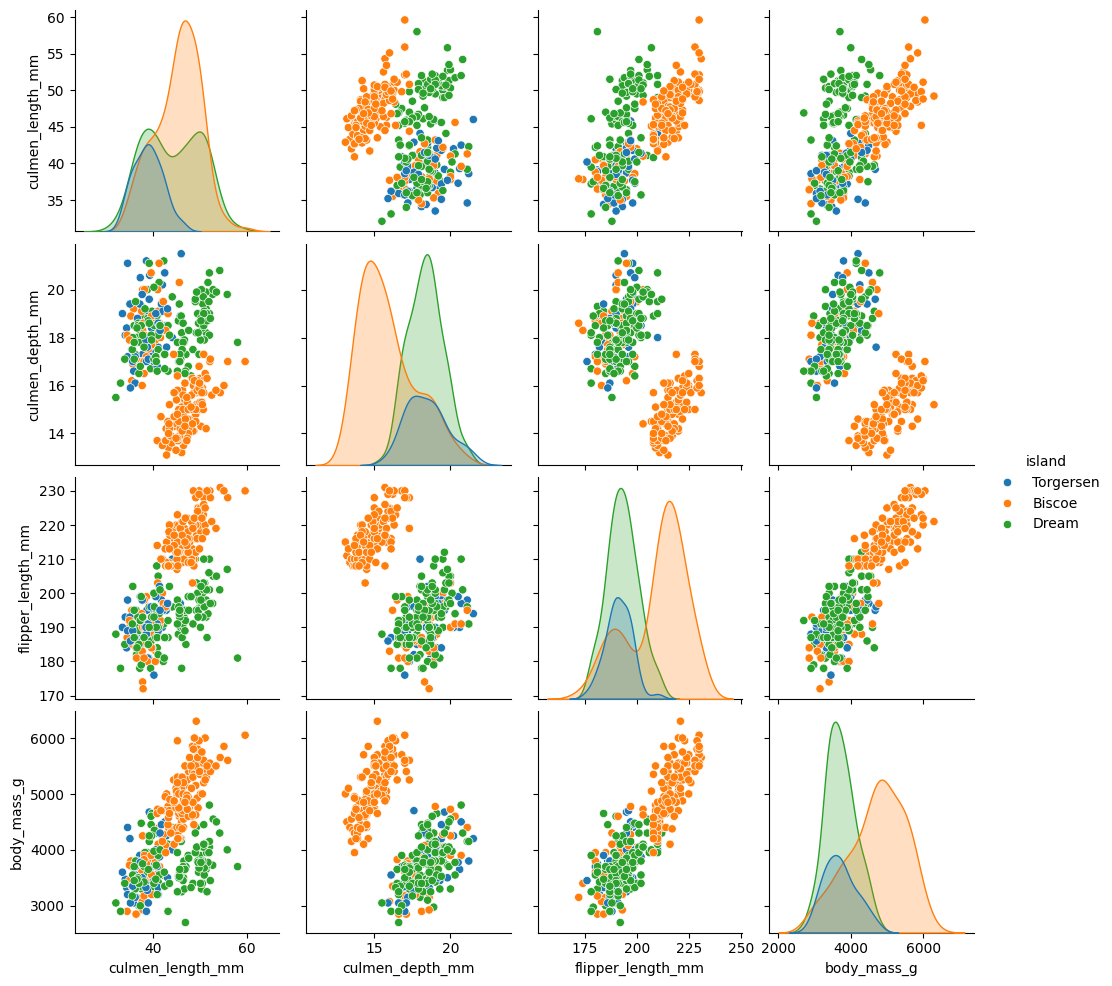

In [37]:
sns.pairplot(df11, hue='island')
plt.show()

Torgersen岛上的企鹅数量明显太少，Biscoe的企鹅在鳍长和体重上呈现巨大差距